# Homework 2 - IEEE Fraud Detection

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

In [3]:
# TODO: code and runtime results
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
def myplot(file,col,a,b):
    temp = pd.crosstab(file[col], trainData['isFraud'], normalize='index') * 100
    temp = temp.reset_index()
    temp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    
    plt.figure(figsize=(a,b))
    plt.suptitle(f"{col} Distributions")
    cplot=sns.countplot(x=col,data=file,order=list(temp[col].values))
    pplot=cplot.twinx()
    pplot=sns.pointplot(x=col,y='Fraud',data=temp,color='Black',order=list(temp[col].values))
    cplot.set_xticklabels(cplot.get_xticklabels(),rotation=45)
    pplot.set_ylabel('% fof fraud transactions')
    return(cplot,pplot)
fields=['TransactionID','isFraud','TransactionDT','TransactionAmt','ProductCD','card4','card6','P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2']
trainData=pd.read_csv("train_transaction.csv",skipinitialspace=True,usecols=fields)
fields1=['TransactionID','DeviceType','DeviceInfo']
trainIdentity=pd.read_csv("train_identity.csv",skipinitialspace=True,usecols=fields1)
mergeset=pd.merge(trainData,trainIdentity,how='left',left_on='TransactionID', right_on='TransactionID')

Text(0, 0.5, '% total amount in TransactionAmt')

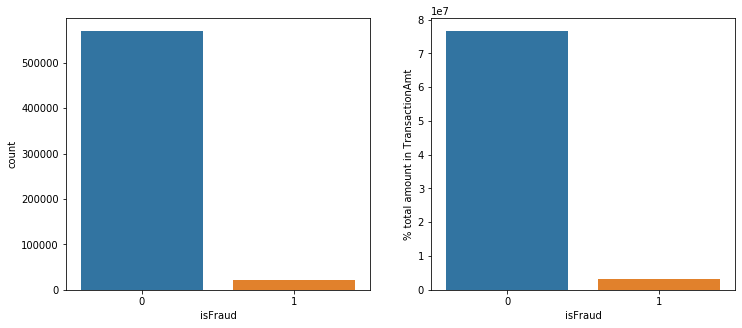

In [4]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plot_tc=sns.countplot(x='isFraud', data=trainData)
transactionPercent=(trainData.groupby(['isFraud'])['TransactionAmt'].sum())
transactionPercent=transactionPercent.reset_index()
plt.subplot(122)
plot_tp=sns.barplot(x='isFraud', y='TransactionAmt', data=transactionPercent)
plot_tp.set_ylabel("% total amount in TransactionAmt")

We see that the number of fraudulent transactions are very small compared to the total number of transactions. Also the sum of transaction amounts in the fraudulent transactions is less.

Text(0, 0.5, '% of Fraud transactions')

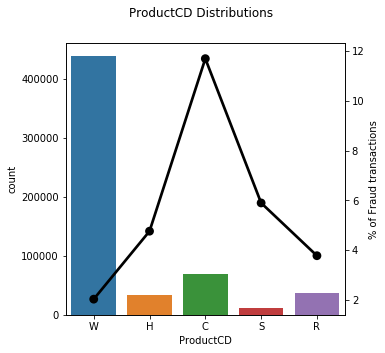

In [5]:
tmp = pd.crosstab(mergeset['ProductCD'],mergeset['isFraud'],normalize='index')*100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'},inplace=True)
plt.figure(figsize=(5,5))
plt.suptitle("ProductCD Distributions")
cplot=sns.countplot(x='ProductCD',data=mergeset)

pplot=cplot.twinx()
pplot=sns.pointplot(x='ProductCD',y='Fraud',data=tmp,color='Black',order=['W','H','C','S','R'])
pplot.set_ylabel('% of Fraud transactions')

Among all the products available, product c has the highest percentage of fraudulent transactions. Since the number of transactions on Product W are maximum but the fraudulent percentage is minimum, it is least prone to fraudulent transactions.

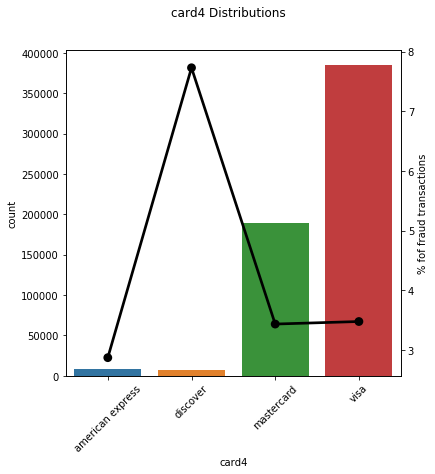

In [6]:
cplotCard4,pplotCard4=myplot(mergeset,'card4',6,6)

Of all the available cards4 values, the highest percentage of fraudulent transactions are through Discover cards and the least through American Express. But the number of transactions through both of them are very less compared to number of transactions through Visa. Eventhough, the percentage of fraudulent transactions through Visa is less, due to its huge number, it contributes the highest to the number of fraudulent transactions.

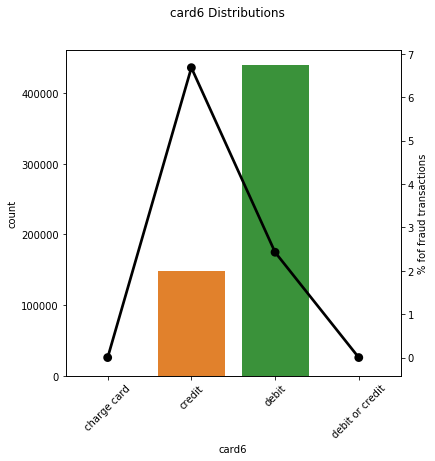

In [7]:
cplotCard6,pplotCard6=myplot(mergeset,'card6',6,6)

We see that Credit cards have the highest percentage of fraudulent transactions while the number of fraudulent ones through debit are comparitively lesser.

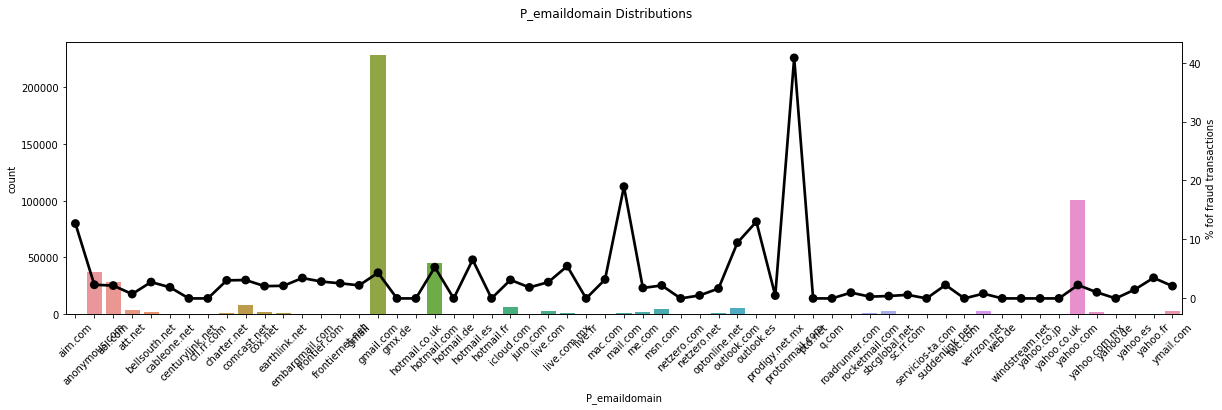

In [8]:
cplotPdom,pplotPdom=myplot(mergeset,'P_emaildomain',20,5)

Of all the email domains present, the highest number of transactions are through gmail.com. But when we consider the percentages of errors, we have mail.com and protonmail.com that have the highest fraudulent transaction percentages.

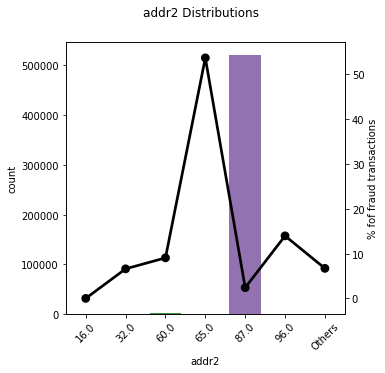

In [9]:
mergeset.loc[mergeset.addr2.isin(mergeset.addr2.value_counts()[mergeset.addr2.value_counts()<= 50].index), 'addr2'] = "Others"
cplotAddr2,pplotAddr2=myplot(mergeset,'addr2',5,5)

Plotting the graph of all the values in addr2 field after cleaning the data to exclude values with too small transaction frequencies, I see that most of the transactions are from the 87.0 locations, but among the few transactions from the area 65.0, most of the transactions are fraudulent. I think this is an interesting plot as this is the first plot that denotes more than 50% chance of a transaction being fraud given the transaction has a value of 65.0 in addr2 field.

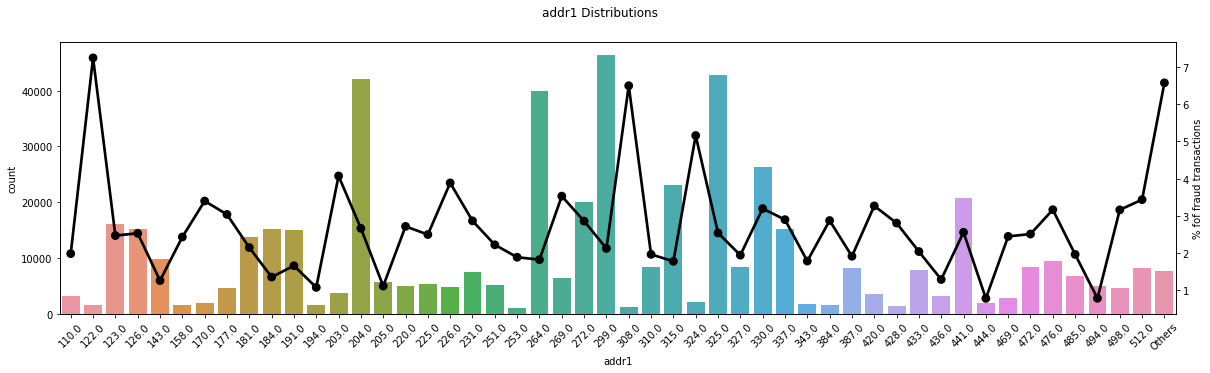

In [10]:
mergeset.loc[mergeset.addr1.isin(mergeset.addr1.value_counts()[mergeset.addr1.value_counts()<= 1000].index), 'addr1'] = "Others"
cplotAddr1,pplotAddr1=myplot(mergeset,'addr1',20,5)

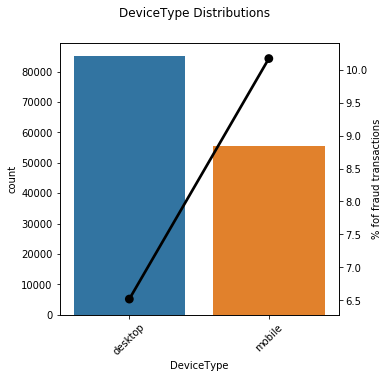

In [11]:
cplotDev,pplotDev=myplot(mergeset,'DeviceType',5,5)

This gives us a relation that most of the fraudulent transactions originate from mobiles.

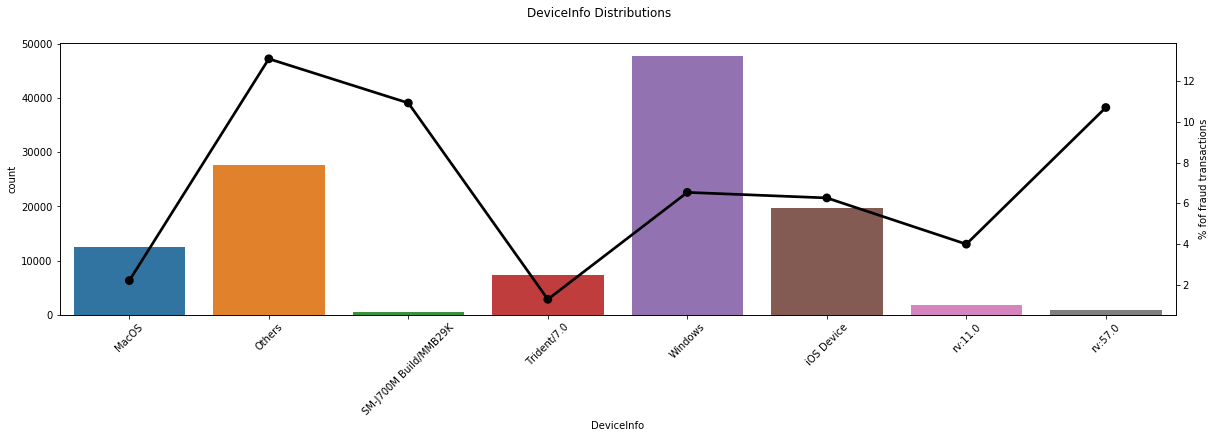

In [12]:
mergeset.loc[mergeset.DeviceInfo.isin(mergeset.DeviceInfo.value_counts()[mergeset.DeviceInfo.value_counts() <500 ].index), 'DeviceInfo'] = "Others"
cplotDevI,pplotDevI=myplot(mergeset,'DeviceInfo',20,5)

The above plot suggests that most of the fraudulent transactions come from an unknown operating system rather than from a stable and known Operating System.

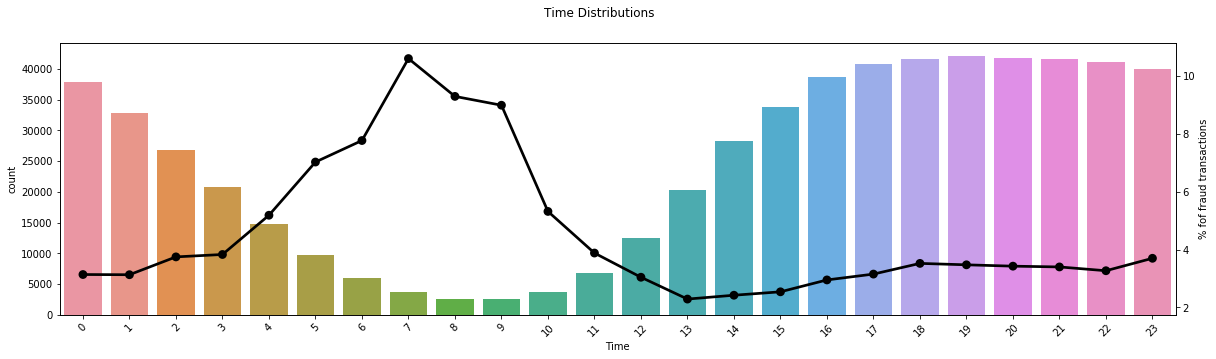

In [13]:
mergeset['Day']=(mergeset['TransactionDT']/(24*60*60)-1).astype(int)
mergeset['Time']=((mergeset['TransactionDT']%(24*60*60))/3600).astype(int)
cplotTime,pplotTime=myplot(mergeset,'Time',20,5)

From the above plot, the waking hours of the general populations can be estimated. Since we see a gradual decrease inn the initial hours followed by an increase, we can estimmate that the general population wakes up around the 12th hour.

## Part 2 - Transaction Frequency

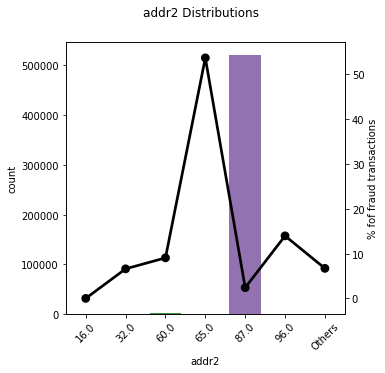

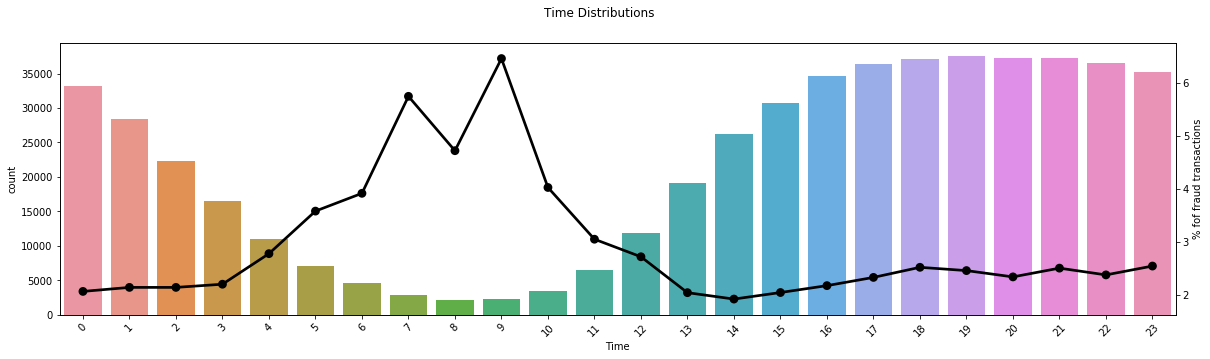

In [14]:
# TODO: code to generate the frequency graph
cplotAddr2,pplotAddr2=myplot(mergeset,'addr2',5,5)
cplotTime,pplotTime=myplot(mergeset[mergeset.addr2.isin([87.0])],'Time',20,5)

I see that the maximum of the transactions are from the loaction with the Addr2 fiels "87.0". On plotting the countplot of the number of transactions done in each hour of the day, I can see that the number of transactions on average are maximum between 0-4 hours and 13-23 hours. Assuming that a general population sleeps for 8 hours a day, the waking hour at location "87.0" is around 12th hour.

## Part 3 - Product Code

,count,mean,std,min,25%,50%,75%,max
ProductCD,,,,,,,,
C,68519.0,42.872353,38.943070,0.251,18.423,31.191,54.102,712.896
H,33024.0,73.170058,61.950955,15.000,35.000,50.000,100.000,500.000
R,37699.0,168.306188,142.035568,25.000,100.000,125.000,200.000,1800.000
S,11628.0,60.269487,80.546775,5.000,20.000,35.000,80.000,1550.000
W,439670.0,153.158554,268.733692,1.000,49.000,78.500,146.000,31937.391


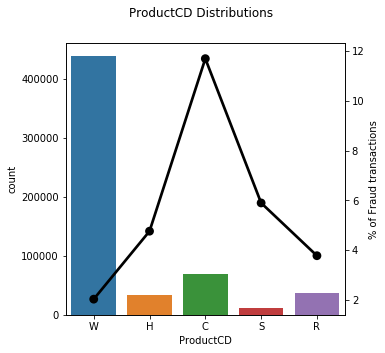

In [15]:
# TODO: code to analyze prices for different product codes
tmp = pd.crosstab(mergeset['ProductCD'],mergeset['isFraud'],normalize='index')*100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'},inplace=True)
plt.figure(figsize=(5,5))
plt.suptitle("ProductCD Distributions")
cplot=sns.countplot(x='ProductCD',data=mergeset)

pplot=cplot.twinx()
pplot=sns.pointplot(x='ProductCD',y='Fraud',data=tmp,color='Black',order=['W','H','C','S','R'])
pplot.set_ylabel('% of Fraud transactions')
tmp1=mergeset.groupby('ProductCD')['TransactionAmt']
tmp1.describe()

By grouping the dataset with ProductCD, it is see that every metric like the mean, min, first quartile etc are least for product C. So this can be considered as the cheapest product.
For the most expensive product, both Product R and W have similar values in each of the above metrics except fro the max. Since Product W has the highest number of transactions, it can be considered the most frequently bought product.
The highest value of a transaction on Product W is comparitively higher than the max of Product R. But that could be an outlier as other metrics on Product R are higher. So I would consider Product R to be the most expensive product.

## Part 4 - Correlation Coefficient

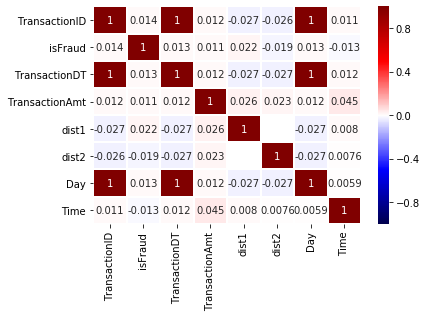

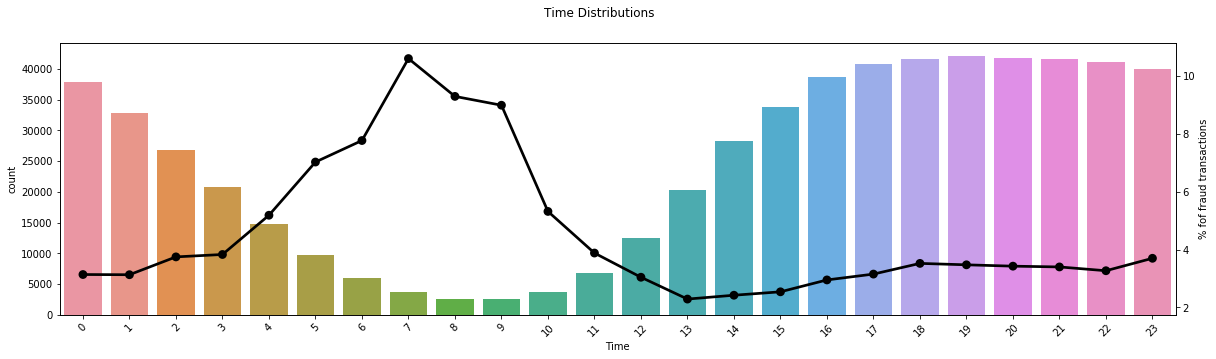

In [16]:
# TODO: code to calculate correlation coefficient
sns.heatmap(mergeset.corr(), vmin=-1, vmax=1, cmap='seismic', linewidths=1, annot=True);
cplotTime,pplotTime=myplot(mergeset,'Time',20,5);

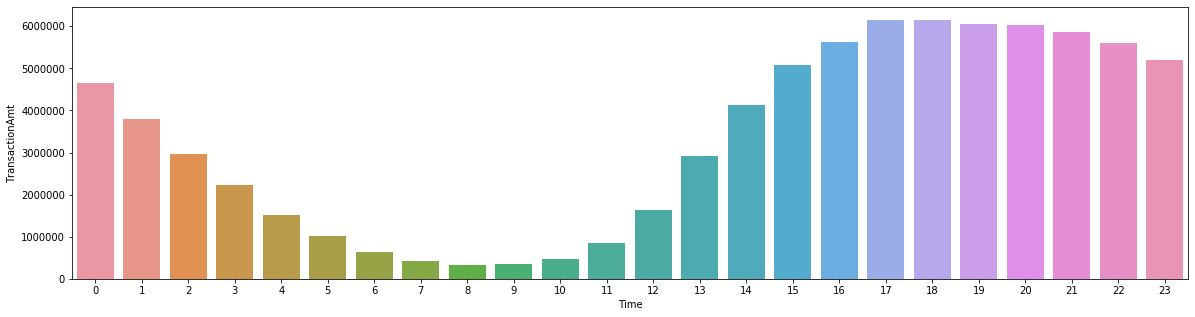

In [40]:
y=mergeset.groupby(['Time'])['TransactionAmt'].sum()
y=y.reset_index()
plt.figure(111,figsize=(20,5))
cplot=sns.barplot(x=y['Time'],y=y['TransactionAmt'])

The purchase amount follows a trend with the hour of the day. It gradually decreases for a few hours and then starts increasing. This usually signifies the sleeping hours and the waking hours of the general population.
The Transaction amount is a feature that has the highest correlation in the complete data set with the hour of the day(Time) and has a value of "0.045".

## Part 5 - Interesting Plot

In [41]:
# TODO: code to generate the plot here.
interesting=mergeset.copy()
interesting.sort_values('TransactionAmt').head(50)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card4,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,DeviceType,DeviceInfo,Day,Time
374299,3361299,0,9324090,0.251,C,visa,debit,NaN,NaN,NaN,NaN,hotmail.com,hotmail.com,mobile,NaN,106,22
367961,3354961,0,9147032,0.272,C,mastercard,credit,NaN,NaN,NaN,NaN,gmail.com,gmail.com,mobile,NaN,104,20
205872,3192872,1,4734702,0.292,C,visa,debit,NaN,NaN,NaN,NaN,anonymous.com,anonymous.com,mobile,Others,53,19
205865,3192865,1,4734545,0.292,C,visa,debit,NaN,NaN,NaN,NaN,anonymous.com,anonymous.com,mobile,Others,53,19
29976,3016976,1,757661,0.292,C,visa,debit,NaN,NaN,NaN,NaN,anonymous.com,anonymous.com,desktop,Windows,7,18
205382,3192382,1,4724798,0.292,C,visa,debit,NaN,NaN,NaN,9.0,anonymous.com,anonymous.com,mobile,Others,53,16
205370,3192370,1,4724487,0.292,C,visa,debit,NaN,NaN,NaN,9.0,anonymous.com,anonymous.com,mobile,Others,53,16
205393,3192393,1,4725018,0.350,C,visa,debit,NaN,NaN,NaN,9.0,anonymous.com,anonymous.com,mobile,Others,53,16
492354,3479354,0,12851308,0.364,C,visa,credit,NaN,NaN,NaN,NaN,gmail.com,gmail.com,mobile,Others,147,17
41962,3028962,1,1021983,0.424,C,visa,credit,Others,60,NaN,476.0,hotmail.com,hotmail.com,desktop,NaN,10,19


On sorting the dataset by "TransactionAmt" column, I see that most of the times when the first transaction of a specific amount is a fraudulent transaction, the following transactions of the same amount are also fraudulent.

I also observed that dist1 and dist2 valus for a specific transaction are exclusively present,i.e if one is present, the other is filled with NaN.

## Part 6 - Prediction Model

In [116]:
# TODO: code for your final model
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


trainData=pd.read_csv("train_transaction.csv",skipinitialspace=True)
trainIdentity=pd.read_csv("train_identity.csv",skipinitialspace=True)
mergetrainset=pd.merge(trainData,trainIdentity,how='left',left_on='TransactionID', right_on='TransactionID')
testData=pd.read_csv("test_transaction.csv",skipinitialspace=True)
testIdentity=pd.read_csv("test_identity.csv",skipinitialspace=True)
mergetestset=pd.merge(testData,testIdentity,how='left',left_on='TransactionID', right_on='TransactionID')
fields=['ProductCD','card1','card2','card3','card4','card5','card6','addr1','addr2','dist1','dist2','P_emaildomain','R_emaildomain','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15','M1','M2','M3','M4','M5','M6','M7','M8','M9','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','V29','V30','V31','V32','V33','V34','V35','V36','V37','V38','V39','V40','V41','V42','V43','V44','V45','V46','V47','V48','V49','V50','V51','V52','V53','V54','V55','V56','V57','V58','V59','V60','V61','V62','V63','V64','V65','V66','V67','V68','V69','V70','V71','V72','V73','V74','V75','V76','V77','V78','V79','V80','V81','V82','V83','V84','V85','V86','V87','V88','V89','V90','V91','V92','V93','V94','V95','V96','V97','V98','V99','V100','V101','V102','V103','V104','V105','V106','V107','V108','V109','V110','V111','V112','V113','V114','V115','V116','V117','V118','V119','V120','V121','V122','V123','V124','V125','V126','V127','V128','V129','V130','V131','V132','V133','V134','V135','V136','V137','V138','V139','V140','V141','V142','V143','V144','V145','V146','V147','V148','V149','V150','V151','V152','V153','V154','V155','V156','V157','V158','V159','V160','V161','V162','V163','V164','V165','V166','V167','V168','V169','V170','V171','V172','V173','V174','V175','V176','V177','V178','V179','V180','V181','V182','V183','V184','V185','V186','V187','V188','V189','V190','V191','V192','V193','V194','V195','V196','V197','V198','V199','V200','V201','V202','V203','V204','V205','V206','V207','V208','V209','V210','V211','V212','V213','V214','V215','V216','V217','V218','V219','V220','V221','V222','V223','V224','V225','V226','V227','V228','V229','V230','V231','V232','V233','V234','V235','V236','V237','V238','V239','V240','V241','V242','V243','V244','V245','V246','V247','V248','V249','V250','V251','V252','V253','V254','V255','V256','V257','V258','V259','V260','V261','V262','V263','V264','V265','V266','V267','V268','V269','V270','V271','V272','V273','V274','V275','V276','V277','V278','V279','V280','V281','V282','V283','V284','V285','V286','V287','V288','V289','V290','V291','V292','V293','V294','V295','V296','V297','V298','V299','V300','V301','V302','V303','V304','V305','V306','V307','V308','V309','V310','V311','V312','V313','V314','V315','V316','V317','V318','V319','V320','V321','V322','V323','V324','V325','V326','V327','V328','V329','V330','V331','V332','V333','V334','V335','V336','V337','V338','V339','id_01','id_02','id_03','id_04','id_05','id_06','id_07','id_08','id_09','id_10','id_11','id_12','id_13','id_14','id_15','id_16','id_17','id_18','id_19','id_20','id_21','id_22','id_23','id_24','id_25','id_26','id_27','id_28','id_29','id_30','id_31','id_32','id_33','id_34','id_35','id_36','id_37','id_38','DeviceType','DeviceInfo']
for cl in fields:
    x=mergetrainset[cl].mode()[0]
    y=mergetestset[cl].mode()[0]
    mergetrainset[cl].fillna(x,inplace=True)
    mergetestset[cl].fillna(y,inplace=True)
mergetrainset['Time']=((mergetrainset['TransactionDT']%(24*60*60))/3600).astype(int)
mergetestset['Time']=((mergetestset['TransactionDT']%(24*60*60))/3600).astype(int)
mergetrainset1=mergetrainset.drop(['isFraud','TransactionDT'], axis=1)
mergetestset=mergetestset.drop(['TransactionDT'],axis=1)
enc=LabelEncoder()
for cl in fields:
    cols=list(mergetrainset1[cl].values.astype(str))+list(mergetestset[cl].values.astype(str))
    enc.fit(cols)
    mergetrainset1[cl]=enc.transform(mergetrainset1[cl].astype(str))
    mergetestset[cl]=enc.transform(mergetestset[cl].astype(str))
X_train, X_test, y_train, y_test = train_test_split(mergetrainset1, mergetrainset['isFraud'], test_size=0.1,random_state = 42)

clf = CatBoostRegressor(iterations=2000,task_type="GPU",devices='0:1')
clf.fit(X_train,y_train,verbose=False)
preds=clf.predict(X_test)
new_preds=clf.predict(mergetestset)
new_preds.round()
output=pd.DataFrame({'TransactionID': mergetestset['TransactionID'], 'isFraud': new_preds[:]})
output.to_csv('submission.csv', index=False)

0.9767670267890406


For my prediction model, I am using all the features that were given as a part of the dataset. I am replacing all the NaN values with the most frequent value(mode) of that column. For the regression model, I am using the CatBoostRegressor which makes use of decision tree based learning algorithms. I have tried using other learning models like lightgbm and XGBoostRegressor but I did not get similar results is them.

## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/abhinaymadunanthu

Highest Rank: 4640

Score: 0.9081

Number of entries: 23

INCLUDE IMAGE OF YOUR KAGGLE RANKING
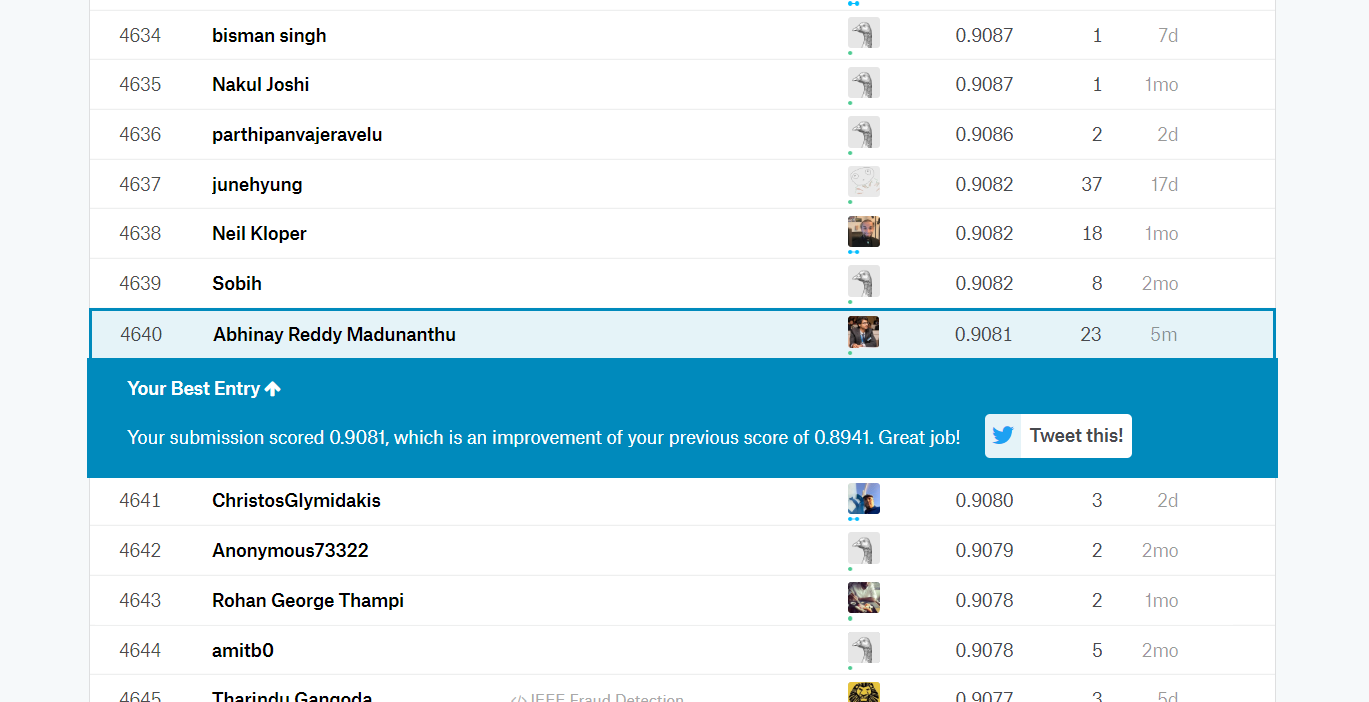

References:

https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

https://catboost.ai/docs/concepts/about.html

https://stackoverflow.com/questions/58103322/how-to-merge-rows-based-on-condition

https://stackoverflow.com/questions/58101126/using-scikit-learn-onehotencoder-with-a-pandas-dataframe

https://stackoverflow.com/questions/58100983/changing-a-dataframe-column-dates-type

https://stackoverflow.com/questions/53414960/how-do-i-create-a-sum-row-and-sum-column-in-pandas

https://lightgbm.readthedocs.io/en/latest/

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

https://seaborn.pydata.org/examples/distplot_options.html

https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

https://stackoverflow.com/questions/42789324/pandas-fillna-mode

http://www.statsoft.com/Textbook/Boosting-Trees-Regression-Classification

https://colab.research.google.com/drive/15hxWrWaToOZpMlc4Zw1gyjpXopbzxZ6v#scrollTo=UBp5A-PiAX6M

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

https://stats.stackexchange.com/questions/284712/how-does-the-l-bfgs-work

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://stackoverflow.com/questions/20763012/creating-a-pandas-dataframe-from-a-numpy-array-how-do-i-specify-the-index-colum

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

https://news.developer.nvidia.com/optimizing-xgboost-and-random-forest-machine-learning-approaches-on-nvidia-gpus/

https://github.com/Xtra-Computing/thundergbm/blob/master/docs/how-to.md#build-on-windows

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

https://stackoverflow.com/questions/48523762/pandas-fillna-currently-only-can-fill-with-dict-series-column-by-column

https://stackoverflow.com/questions/34997134/random-forest-tuning-tree-depth-and-number-of-trees

https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621

https://stackoverflow.com/questions/40142686/converting-non-numeric-to-numeric-value-using-panda-libraries

https://stackoverflow.com/questions/49968432/running-sklearns-label-encoder-on-all-columns-at-once

https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn

https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html